### Crater Rim Erasure

This notebook visualizes crater rim erasure as a result of new crater formation. A simulation is run and craters are plotted with erased crater segments shown in blue.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

These first three plots show an effective radius multiplier of 1 after 100, 200, and 300 craters.

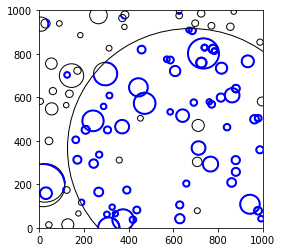

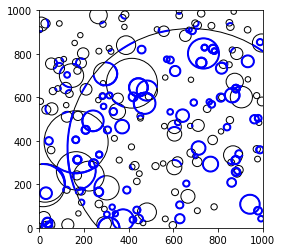

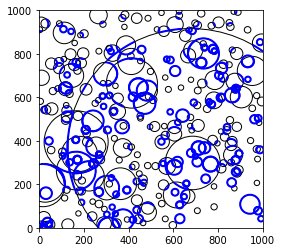

In [2]:
power_law_distribution = PowerLawProbabilityDistribution(slope=-2.8, min_value=12)
scale = 1000
craters = get_craters(300, power_law_distribution, scale)
erased_rim_arcs = get_erased_rim_arcs(craters, 1)
plot_up_to_crater(100, craters, erased_rim_arcs, scale)
plot_up_to_crater(200, craters, erased_rim_arcs, scale)
plot_up_to_crater(300, craters, erased_rim_arcs, scale)

These plots show an effective radius multiplier of 1.5

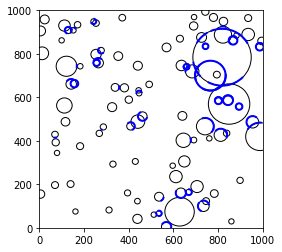

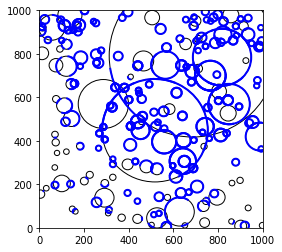

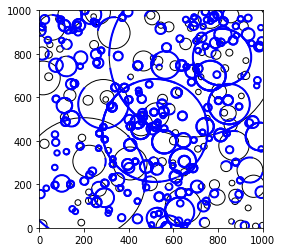

In [3]:
power_law_distribution = PowerLawProbabilityDistribution(slope=-2.8, min_value=12)
scale = 1000
craters = get_craters(300, power_law_distribution, scale)
erased_rim_arcs = get_erased_rim_arcs(craters, 1.5)
plot_up_to_crater(100, craters, erased_rim_arcs, scale)
plot_up_to_crater(200, craters, erased_rim_arcs, scale)
plot_up_to_crater(300, craters, erased_rim_arcs, scale)